In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
airports_df = pd.read_csv('../main_directory/downloads/airports.csv')
airlines_df = pd.read_csv('../main_directory/downloads/airlines.csv')
airplanes_df = pd.read_csv('../main_directory/downloads/airplanes.csv')
routes_df = pd.read_csv('../main_directory/downloads/routes.csv')


In [3]:
def visualize_flights_method_3(self, dataframe):

        pass   

def method3(airport, internal=False):
    """Develop a third method that receives an airport as an input and an optional argument called internal 
        with a value of False by default. If internal is True, then this method should plot only the flights 
        leaving this airport with a destination in the same country. Otherwise, it plots all flights."""
    
    routes_df = routes_df.copy()

    routes_df = pd.merge(routes_df, airports_df, left_on='Source airport', right_on='IATA')
    routes_df = routes_df.rename(columns={'Latitude': 'source_lat', 'Longitude': 'source_lon'})
    routes_df = pd.merge(routes_df, airports_df, left_on='Destination airport', right_on='IATA')
    routes_df = routes_df.rename(columns={'Latitude': 'dest_lat', 'Longitude': 'dest_lon'})

    all_routes = routes_df[routes_df['Source airport'] == airport]
    #print(all_routes)
    # append long and lat to the dataframe the source airport and destination airport 

    print(all_routes)


    if internal == False:
        pass
        #return all_routes

    if internal == True:
        
        source_country = airports_df[airports_df["IATA"] == airport]["Country"].values[0]

        airports_source_country = airports_df[airports_df["Country"] == source_country]["IATA"].values

        destination_source_country = all_routes[all_routes["Destination airport"].isin(airports_source_country)]

        #return destination_source_country
    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def method3(self, airport, internal=False):
    """Plot flight routes from a given airport. If internal is True, plot only domestic flights."""
    
    # Copy the routes and airports data to avoid modifying the original dataframes
    routes_df = self.routes_df.copy()
    airports_df = self.airports_df.copy()  # Assuming airports_df is accessible within the class

    # Merge routes with airport data to get source airport latitude and longitude
    routes_df = pd.merge(routes_df, airports_df, left_on='Source airport', right_on='IATA', how='left')
    routes_df = routes_df.rename(columns={'Latitude': 'source_lat', 'Longitude': 'source_lon'})

    # Merge routes with airport data again to get destination airport latitude and longitude
    routes_df = pd.merge(routes_df, airports_df, left_on='Destination airport', right_on='IATA', how='left', suffixes=('', '_dest'))
    routes_df = routes_df.rename(columns={'Latitude_dest': 'dest_lat', 'Longitude_dest': 'dest_lon'})

    # Filter routes by the specified source airport
    all_routes = routes_df[routes_df['Source airport'] == airport]

    if internal:
        # If internal flights are requested, further filter by matching source and destination country
        source_country = airports_df[airports_df["IATA"] == airport]["Country"].values[0]
        internal_routes = all_routes[all_routes['Country_dest'] == source_country]
        routes_to_plot = internal_routes
    else:
        routes_to_plot = all_routes

    # Plotting
    fig, ax = plt.subplots()
    for _, row in routes_to_plot.iterrows():
        # Plot a line between source and destination
        plt.plot([row['source_lon'], row['dest_lon']], [row['source_lat'], row['dest_lat']], marker='o')
    
    plt.title(f"Flights from {airport} ({'Domestic' if internal else 'International'})")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Optionally, return the filtered DataFrame
    return routes_to_plot


In [6]:
m3 = method3("MUC",False)
m3

AttributeError: 'str' object has no attribute 'routes_df'

/var/folders/q8/420_prn108s38dq0t1r701080000gn/T/ipykernel_6990/2000734110.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  routes_to_plot['geometry'] = routes_to_plot.apply(
/var/folders/q8/420_prn108s38dq0t1r701080000gn/T/ipykernel_6990/2000734110.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


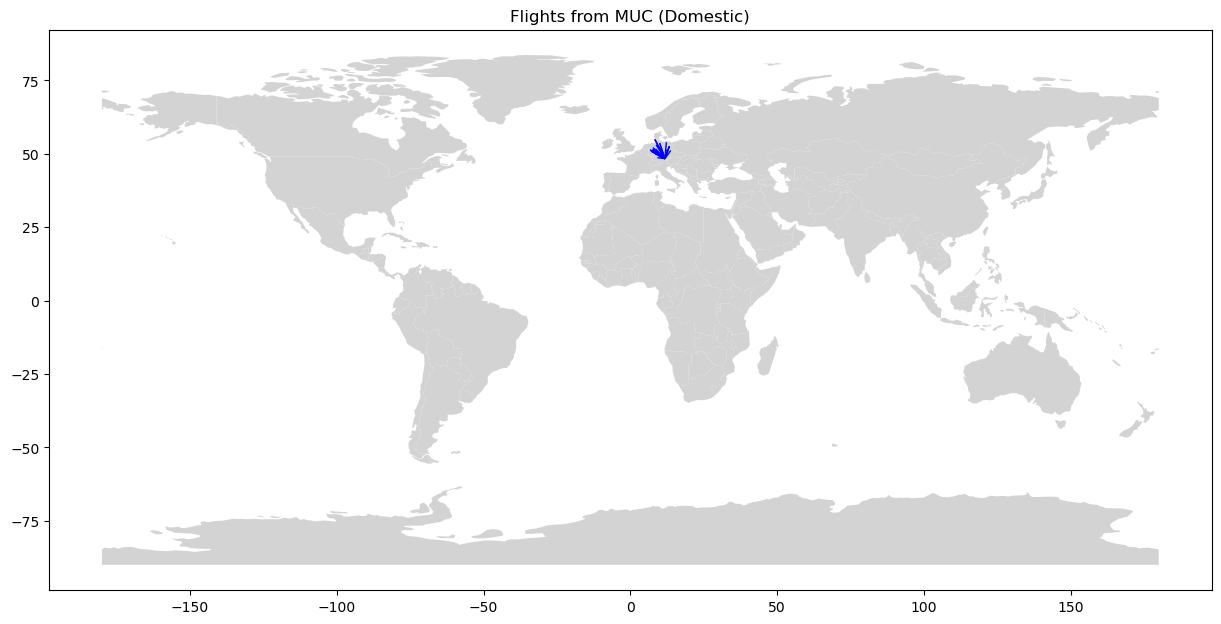

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString

class FlightDataVisualizer:
    def __init__(self, routes_df, airports_df):
        self.routes_df = routes_df
        self.airports_df = airports_df

    def method3(self, airport, internal=False):
        """Plot flight routes from a given airport using GeoPandas. If internal is True, plot only domestic flights."""
        routes_df = self.routes_df.copy()
        airports_df = self.airports_df.copy()

        # Merge routes with airport data to get coordinates for source and destination
        routes_df = pd.merge(routes_df, airports_df, left_on='Source airport', right_on='IATA', how='left')
        routes_df = routes_df.rename(columns={'Latitude': 'source_lat', 'Longitude': 'source_lon'})
        routes_df = pd.merge(routes_df, airports_df, left_on='Destination airport', right_on='IATA', how='left', suffixes=('', '_dest'))
        routes_df = routes_df.rename(columns={'Latitude': 'dest_lat', 'Longitude': 'dest_lon'})

        # Filter routes by the specified source airport
        all_routes = routes_df[routes_df['Source airport'] == airport]

        if internal:
            # Filter for domestic flights
            source_country = airports_df[airports_df["IATA"] == airport]["Country"].values[0]
            internal_routes = all_routes[all_routes['Country_dest'] == source_country]
            routes_to_plot = internal_routes
        else:
            routes_to_plot = all_routes

        # Create GeoDataFrame for plotting
        # Convert each route to a LineString geometry
        routes_to_plot['geometry'] = routes_to_plot.apply(
            lambda row: LineString([(row['source_lon'], row['source_lat']), (row['dest_lon'], row['dest_lat'])]),
            axis=1
        )
        geo_routes = gpd.GeoDataFrame(routes_to_plot, geometry='geometry')

        # Plot using GeoPandas
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        fig, ax = plt.subplots(figsize=(15, 10))
        world.plot(ax=ax, color='lightgrey')
        geo_routes.plot(ax=ax, color='blue', linewidth=1, markersize=2)

        plt.title(f"Flights from {airport} ({'Domestic' if internal else 'International'})")
        plt.show()

# Example usage:
# Assuming you have defined `routes_df` and `airports_df` DataFrames appropriately
visualizer = FlightDataVisualizer(routes_df, airports_df)
visualizer.method3("MUC", True)
